In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


### récupérer les données

In [248]:
path = './dataset/'

fertilizers_file = 'fertilizers.csv'
crop_recommendation_file = 'crop_recommendation.csv'

In [249]:
fertilizers = pd.read_csv(path + fertilizers_file, skip_blank_lines=True)
crop_recommendation = pd.read_csv(path + crop_recommendation_file, skip_blank_lines=True)


In [250]:

print(fertilizers.dtypes)
print(crop_recommendation.dtypes)



Temparature        float64
Humidity           float64
Moisture           float64
Soil Type           object
Crop Type           object
Nitrogen             int64
Potassium            int64
Phosphorous          int64
Fertilizer Name     object
dtype: object
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


### Graphique 1 | Nutrition (Azote, Phosphore, Potassium) selon le type de culture

<Figure size 1400x600 with 0 Axes>

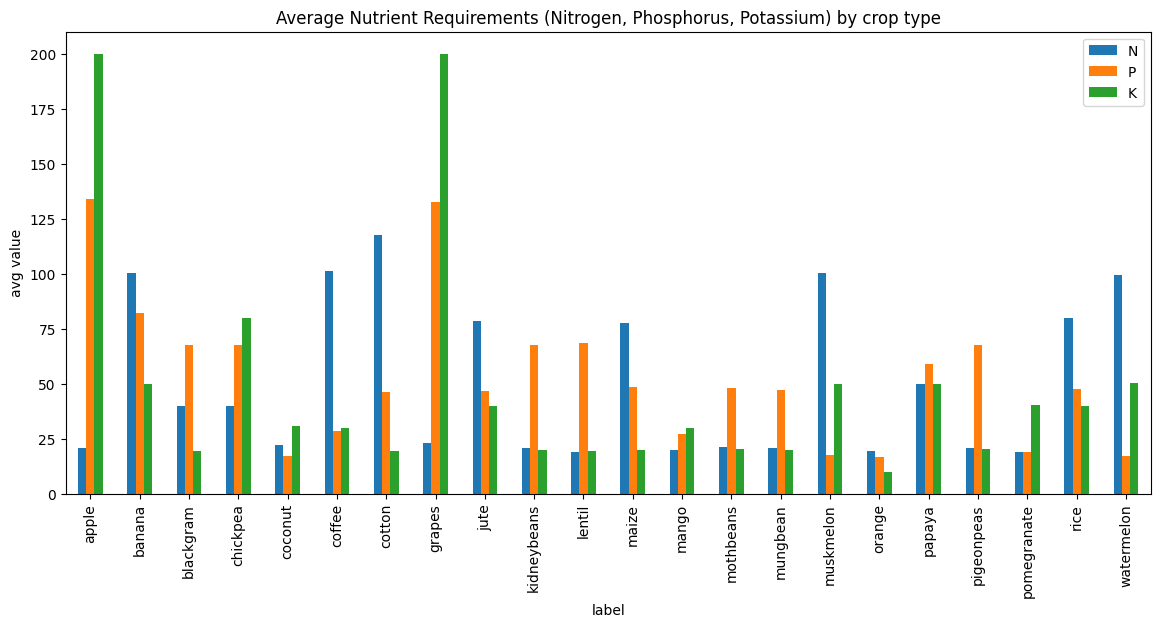

In [251]:
avg_npk = crop_recommendation.groupby("label")[["N","P","K"]].mean().reset_index()

plt.figure(figsize=(14,6))
avg_npk.plot(x="label", kind="bar", figsize=(14,6))
plt.xticks(rotation=90)
plt.title("Average Nutrient Requirements (Nitrogen, Phosphorus, Potassium) by crop type")
plt.ylabel("avg value")
plt.show()



### Graphique 2 | Relation entre la pluie et la température selon le type de culture

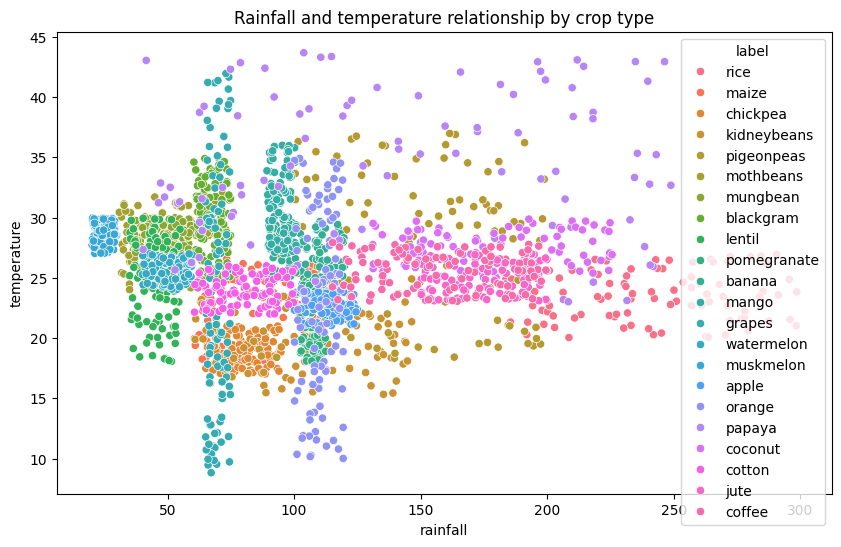

In [252]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=crop_recommendation, x="rainfall", y="temperature", hue="label")
plt.title("Rainfall and temperature relationship by crop type")
plt.show()


### Graphique 3 | Compatibilité des cultures selon le type de sol

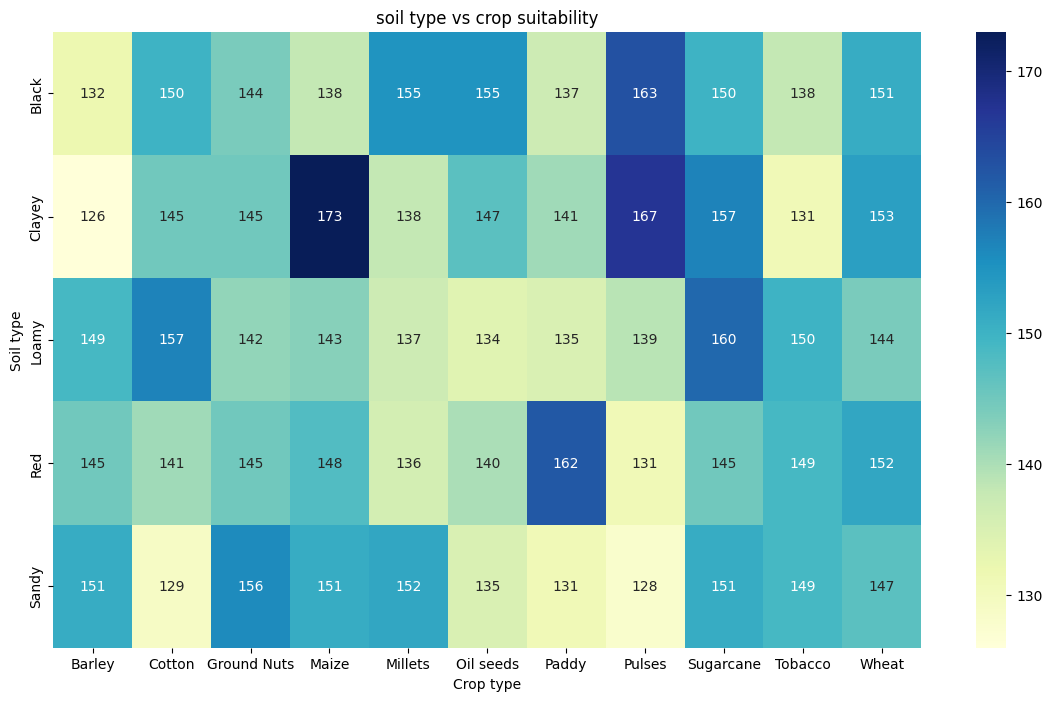

In [253]:
heatmap_data = pd.crosstab(fertilizers["Soil Type"], fertilizers["Crop Type"])

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("soil type vs crop suitability")
plt.xlabel("Crop type")
plt.ylabel("Soil type")
plt.show()

### Graphique 4 | Quelles cultures sont adaptées à quels types de sols

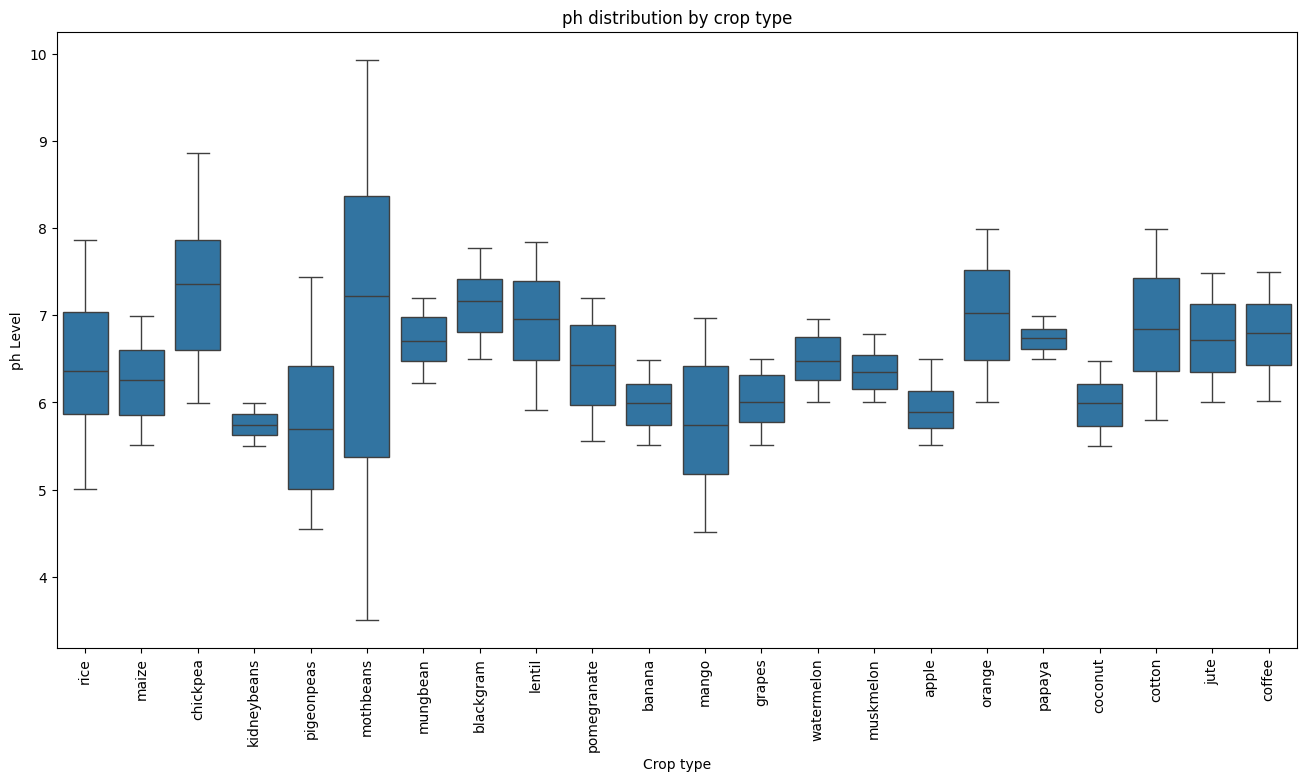

In [254]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=crop_recommendation, x="label", y="ph")
plt.xticks(rotation=90)
plt.title("ph distribution by crop type")
plt.xlabel("Crop type")
plt.ylabel("ph Level")
plt.show()


### Graphique 5 | nutrition selon type d’engrais

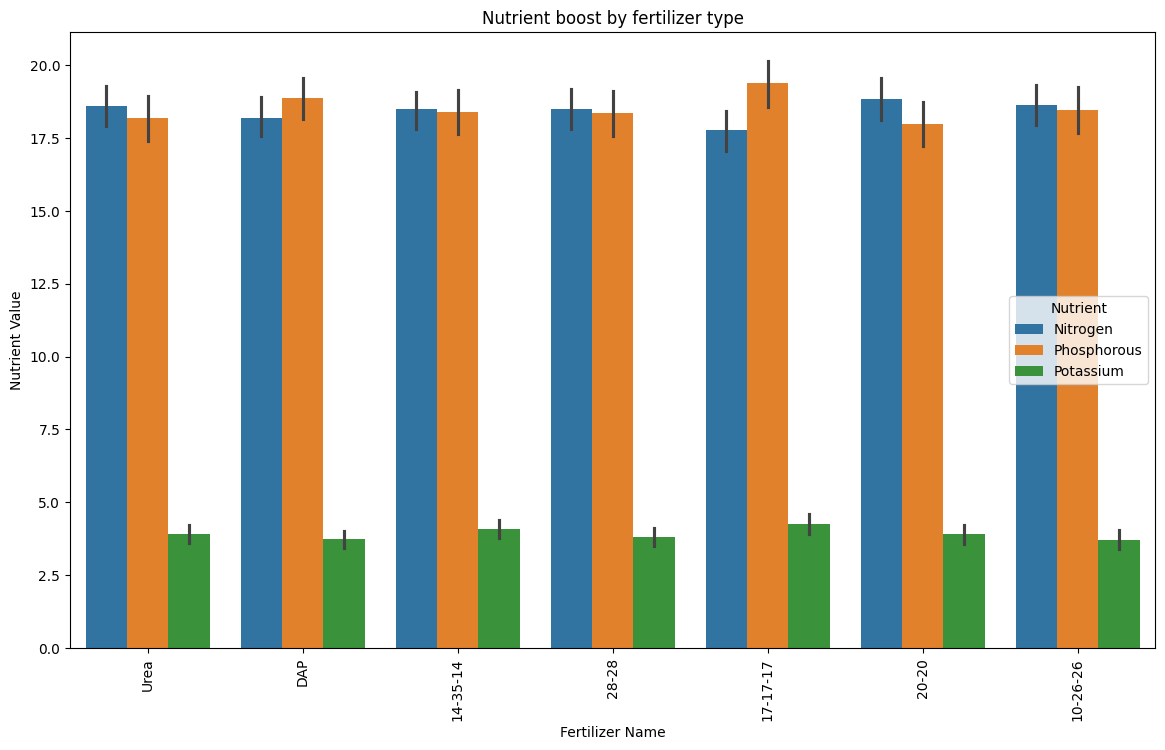

In [255]:

fert_long = fertilizers.melt(
    id_vars=["Fertilizer Name"],
    value_vars=["Nitrogen", "Phosphorous", "Potassium"],
    var_name="Nutrient",
    value_name="Value"
)

plt.figure(figsize=(14, 8))
sns.barplot(data=fert_long, x="Fertilizer Name", y="Value", hue="Nutrient")
plt.xticks(rotation=90)
plt.title("Nutrient boost by fertilizer type")
plt.xlabel("Fertilizer Name")
plt.ylabel("Nutrient Value")
plt.show()
